In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [2]:
df_train=pd.read_csv('/content/train_Loan.csv')
df_test=pd.read_csv('/content/test_Loan.csv')
sample_sub=pd.read_csv('/content/sample_submission_loan.csv')

In [3]:
print('Shape_train_set',df_train.shape)
print('Shape_test_set',df_test.shape)

Shape_train_set (614, 13)
Shape_test_set (367, 12)


In [4]:
df_train.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [5]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


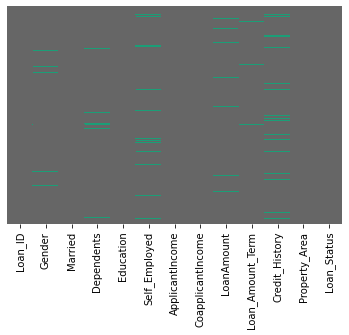

In [9]:
sns.heatmap(df_train.isnull() ,cbar=False,yticklabels=False,cmap='Dark2_r')

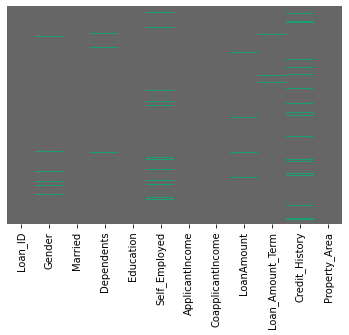

In [10]:
sns.heatmap(df_test.isnull() ,cbar=False,yticklabels=False,cmap='Dark2_r')

In [11]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
for col in df_train:
  print('{} count_unique : \n {} -- {}'.format(col,len(df_train[col].unique()),df_train[col].dtypes))

Loan_ID count_unique : 
 614 -- object
Gender count_unique : 
 3 -- object
Married count_unique : 
 3 -- object
Dependents count_unique : 
 5 -- object
Education count_unique : 
 2 -- object
Self_Employed count_unique : 
 3 -- object
ApplicantIncome count_unique : 
 505 -- int64
CoapplicantIncome count_unique : 
 287 -- float64
LoanAmount count_unique : 
 204 -- float64
Loan_Amount_Term count_unique : 
 11 -- float64
Credit_History count_unique : 
 3 -- float64
Property_Area count_unique : 
 3 -- object
Loan_Status count_unique : 
 2 -- object


In [14]:
for col in df_test:
  print('{} count_unique : \n {} -- {}'.format(col,len(df_test[col].unique()),df_test[col].dtypes))

Loan_ID count_unique : 
 367 -- object
Gender count_unique : 
 3 -- object
Married count_unique : 
 2 -- object
Dependents count_unique : 
 5 -- object
Education count_unique : 
 2 -- object
Self_Employed count_unique : 
 3 -- object
ApplicantIncome count_unique : 
 314 -- int64
CoapplicantIncome count_unique : 
 194 -- int64
LoanAmount count_unique : 
 145 -- float64
Loan_Amount_Term count_unique : 
 13 -- float64
Credit_History count_unique : 
 3 -- float64
Property_Area count_unique : 
 3 -- object


In [15]:
#columns having na
feature_na =[col for col in df_train.columns if df_train[col].isnull().sum()>1]
feature_na
#%of na in  feature_na col
for col in feature_na:
  print(col,'na %:',np.round(df_train[col].isnull().mean(),5))

Gender na %: 0.02117
Married na %: 0.00489
Dependents na %: 0.02443
Self_Employed na %: 0.05212
LoanAmount na %: 0.03583
Loan_Amount_Term na %: 0.0228
Credit_History na %: 0.08143


In [16]:
from sklearn.preprocessing import LabelEncoder
label_en =LabelEncoder()
df_train['Loan_Status'] =label_en.fit_transform(df_train['Loan_Status'])

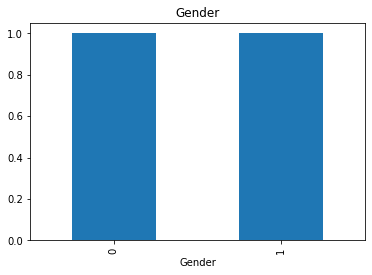

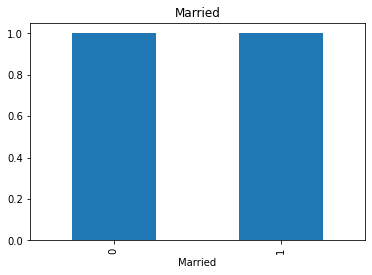

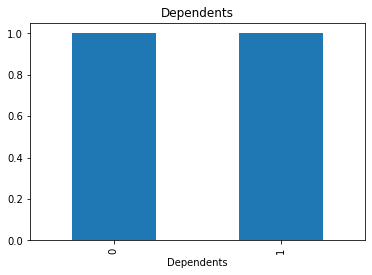

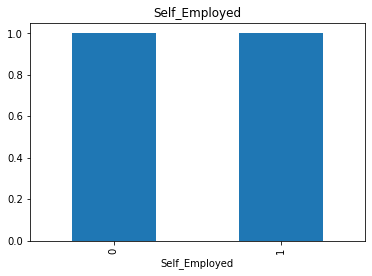

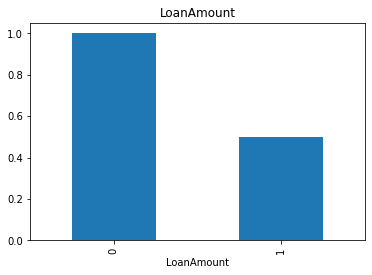

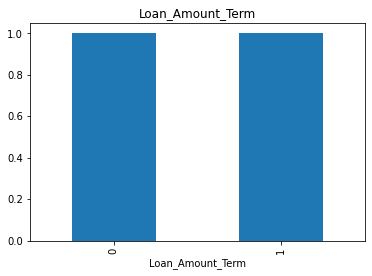

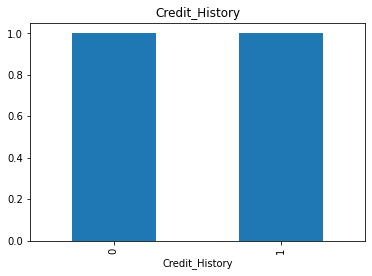

In [17]:
#checking how much missing affect the loan-staus
data =df_train.copy()
for col in feature_na:
  data[col] =np.where(data[col].isnull(),1,0)

  data.groupby(col)['Loan_Status'].median().plot.bar()
  plt.title(col)
  plt.show()

In [18]:
df_train['Self_Employed'].dtype

dtype('O')

In [19]:
numerical_feature=[]
count_int =0
for col in df_train.columns:
  if (df_train[col].dtypes != 'O') :
    count_int =count_int+1
    numerical_feature.append(col)
    print('{} :{}'.format(col ,df_train[col].dtypes))
print('\nCount_int_col :',count_int)
print('\nNumerical_feature:\n',numerical_feature)

ApplicantIncome :int64
CoapplicantIncome :float64
LoanAmount :float64
Loan_Amount_Term :float64
Credit_History :float64
Loan_Status :int64

Count_int_col : 6

Numerical_feature:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']


In [20]:
print('Null_Count')
for col in numerical_feature:
  if col !='Loan_Status' :
    print("{} :Train_set:{}".format(col,df_train[col].isnull().sum()))
    print("{} :Test_set:{}".format(col,df_test[col].isnull().sum()))


Null_Count
ApplicantIncome :Train_set:0
ApplicantIncome :Test_set:0
CoapplicantIncome :Train_set:0
CoapplicantIncome :Test_set:0
LoanAmount :Train_set:22
LoanAmount :Test_set:5
Loan_Amount_Term :Train_set:14
Loan_Amount_Term :Test_set:6
Credit_History :Train_set:50
Credit_History :Test_set:29


In [21]:
#loan amount
df_train['LoanAmount'].fillna(0,inplace=True)
print(df_train['LoanAmount'].isna().sum())
df_train['LoanAmount']=df_train['LoanAmount'].astype(int)
df_train['LoanAmount'].replace(0,df_train['LoanAmount'].median())
print(df_train['LoanAmount'].dtype)

print('\n')


df_test['LoanAmount'].fillna(0,inplace=True)
print(df_test['LoanAmount'].isna().sum())
df_test['LoanAmount']=df_test['LoanAmount'].astype(int)
df_test['LoanAmount'].replace(0,df_test['LoanAmount'].median())
print(df_test['LoanAmount'].dtype)

0
int64


0
int64


In [22]:
#Loan_Amount_Term
df_train['Loan_Amount_Term'].fillna(0,inplace=True)
print(df_train['Loan_Amount_Term'].isna().sum())
df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].astype(int)
df_train['Loan_Amount_Term'].replace(0,df_train['Loan_Amount_Term'].median())
print(df_train['Loan_Amount_Term'].dtype)

print('\n')


df_test['Loan_Amount_Term'].fillna(0,inplace=True)
print(df_test['Loan_Amount_Term'].isna().sum())
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].astype(int)
df_test['Loan_Amount_Term'].replace(0,df_test['Loan_Amount_Term'].median())
print(df_test['Loan_Amount_Term'].dtype)

0
int64


0
int64


In [23]:
#Credit_History 
df_train['Credit_History'].fillna(0,inplace=True)
print(df_train['Credit_History'].isna().sum())
df_train['Credit_History']=df_train['Credit_History'].astype(int)
df_train['Credit_History'].replace(0,df_train['Credit_History'].median())
print(df_train['Credit_History'].dtype)

print('\n')


df_test['Credit_History'].fillna(0,inplace=True)
print(df_test['Credit_History'].isna().sum())
df_test['Credit_History']=df_test['Credit_History'].astype(int)
df_test['Credit_History'].replace(0,df_test['Credit_History'].median())
print(df_test['Credit_History'].dtype)

0
int64


0
int64


In [24]:
categorica_feature=[]
count_int =0
for col in df_train.columns:
  if (df_train[col].dtypes =='O' and  col != 'Loan_Status') :
    count_int =count_int+1
    categorica_feature.append(col)
    print('{} :{}'.format(col ,df_train[col].dtypes))
print('\nCount_int_col :',count_int)
print('\nCategorica_feature:\n',categorica_feature)

Loan_ID :object
Gender :object
Married :object
Dependents :object
Education :object
Self_Employed :object
Property_Area :object

Count_int_col : 7

Categorica_feature:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [25]:
print('Null_Count')
for col in categorica_feature:
  print("{} :Train_set:{}".format(col,df_train[col].isnull().sum()))
  print("{} :Test_set:{}".format(col,df_test[col].isnull().sum()))


Null_Count
Loan_ID :Train_set:0
Loan_ID :Test_set:0
Gender :Train_set:13
Gender :Test_set:11
Married :Train_set:3
Married :Test_set:0
Dependents :Train_set:15
Dependents :Test_set:10
Education :Train_set:0
Education :Test_set:0
Self_Employed :Train_set:32
Self_Employed :Test_set:23
Property_Area :Train_set:0
Property_Area :Test_set:0


In [26]:
for col in categorica_feature:
  print(col,':\n',df_train[col].value_counts())
  print("Count_nan ->",col,":",df_train[col].isnull().sum())
  print("-x-x-x\n")

Loan_ID :
 LP002050    1
LP002778    1
LP001385    1
LP001384    1
LP001917    1
           ..
LP002807    1
LP001760    1
LP002753    1
LP002387    1
LP002401    1
Name: Loan_ID, Length: 614, dtype: int64
Count_nan -> Loan_ID : 0
-x-x-x

Gender :
 Male      489
Female    112
Name: Gender, dtype: int64
Count_nan -> Gender : 13
-x-x-x

Married :
 Yes    398
No     213
Name: Married, dtype: int64
Count_nan -> Married : 3
-x-x-x

Dependents :
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Count_nan -> Dependents : 15
-x-x-x

Education :
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Count_nan -> Education : 0
-x-x-x

Self_Employed :
 No     500
Yes     82
Name: Self_Employed, dtype: int64
Count_nan -> Self_Employed : 32
-x-x-x

Property_Area :
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Count_nan -> Property_Area : 0
-x-x-x



In [27]:
for col in categorica_feature:
  df_train[col].fillna('Missing',inplace=True)
  df_test[col].fillna('Missing',inplace=True)

In [28]:
#train
df_train['Gender'].replace('Missing','Female',inplace=True)
df_train['Self_Employed'].replace('Missing','No',inplace=True)
df_train['Married'].replace('Missing','No',inplace=True)
df_train['Dependents'].replace('Missing','3+',inplace=True)
#test
df_test['Gender'].replace('Missing','Female',inplace=True)
df_test['Self_Employed'].replace('Missing','No',inplace=True)
df_test['Married'].replace('Missing','No',inplace=True)
df_test['Dependents'].replace('Missing','3+',inplace=True)

In [29]:
#changing categorical to numerical 
#label encoding
for col in categorica_feature:
  if col !='Loan_ID':
    df_train[col] =label_en.fit_transform(df_train[col])
    df_test[col] =label_en.fit_transform(df_test[col])

In [30]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,0,360,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128,360,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66,360,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120,360,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141,360,1,2,1


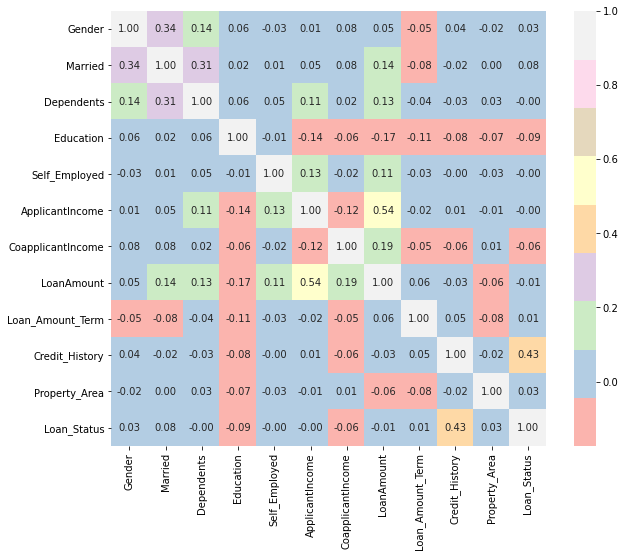

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':10},cmap='Pastel1')

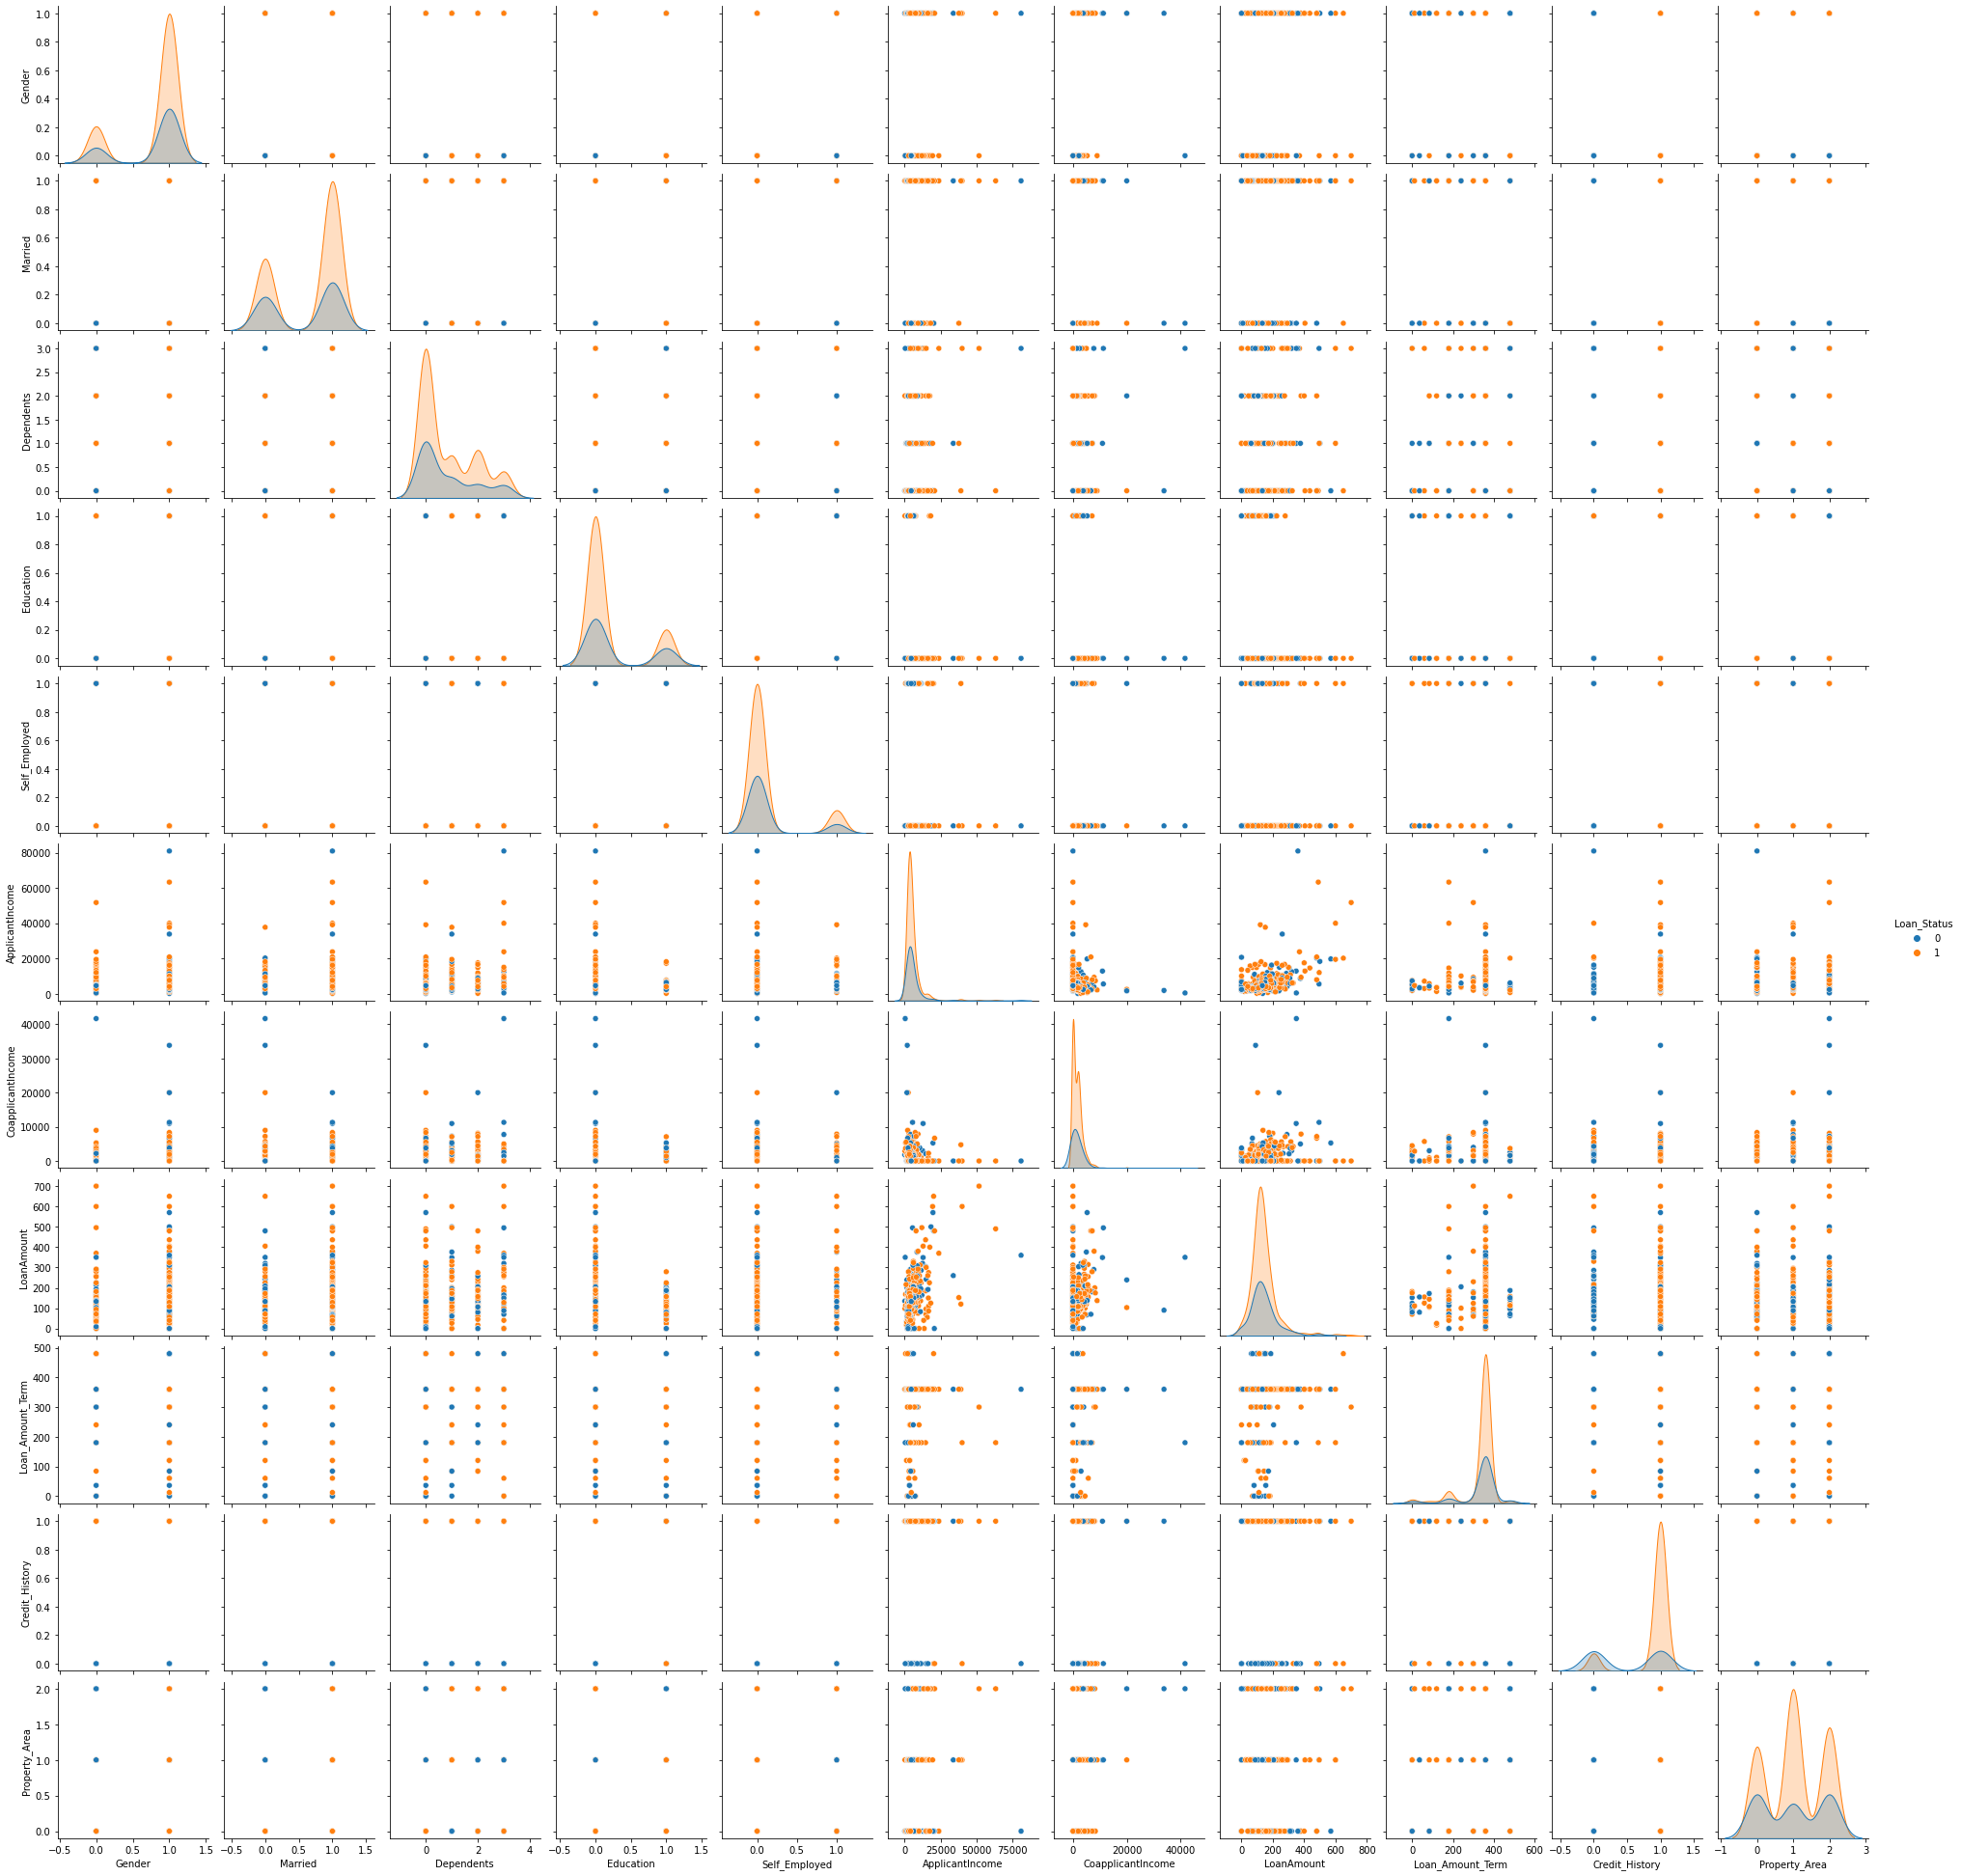

In [32]:
sns.pairplot(df_train,hue='Loan_Status')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

In [34]:
df_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,0,360,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128,360,1,0,0


In [35]:
#indepdent and dependent
X=df_train.iloc[:,1:-1]
y=df_train.iloc[:,-1]

In [36]:
#train test split
X_train ,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=3)

In [37]:
#Decision tree
model =RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [38]:
from sklearn import metrics
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Classification_report \n:',metrics.classification_report(y_test,y_pred))
print('Confusion_Matrix :\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.6972972972972973
Classification_report 
:               precision    recall  f1-score   support

           0       0.41      0.53      0.46        45
           1       0.83      0.75      0.79       140

    accuracy                           0.70       185
   macro avg       0.62      0.64      0.63       185
weighted avg       0.73      0.70      0.71       185

Confusion_Matrix :
 [[ 24  21]
 [ 35 105]]


Hyper tuning 

In [39]:
sorted(model.get_params())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [40]:
#setting the  parameters
params ={
    'criterion':['gini','entropy'],
    'n_estimators':[int(x) for x in np.linspace(start=100 ,stop=1000,num=10)],
    'max_depth':[x for x in np.linspace(10,100,10)],
    'min_samples_split':[1,2,4,5,7,9,10,15],
    'min_samples_leaf':[2,3,4,5,6,7,8,9],
    'max_features':['auto','sqrt','log2']
}

In [41]:
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold 
cvs =KFold(n_splits=10,shuffle=True,random_state=10)

In [42]:
model =RandomForestClassifier()
rf =RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,n_jobs=-1,cv=cvs,verbose=10)
rf.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                              

In [43]:
best_random =rf.best_estimator_
best_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100.0,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=9,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [44]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40.0, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40.0, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
y_pred =model.predict(X_test)
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Confusion_Matrix :\n',metrics.confusion_matrix(y_test,y_pred))
print('Classification_report :\n',metrics.classification_report(y_test,y_pred))


Accuracy_Score : 0.7945945945945946
Confusion_Matrix :
 [[ 23  22]
 [ 16 124]]
Classification_report :
               precision    recall  f1-score   support

           0       0.59      0.51      0.55        45
           1       0.85      0.89      0.87       140

    accuracy                           0.79       185
   macro avg       0.72      0.70      0.71       185
weighted avg       0.79      0.79      0.79       185



In [47]:
#sample submission
df =pd.read_csv('/content/sample_submission_loan.csv')
df.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [48]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110,360,1,2
1,LP001022,1,1,1,0,0,3076,1500,126,360,1,2
2,LP001031,1,1,2,0,0,5000,1800,208,360,1,2
3,LP001035,1,1,2,0,0,2340,2546,100,360,0,2
4,LP001051,1,0,0,1,0,3276,0,78,360,1,2


In [57]:
df_test.shape

(367, 12)

In [89]:
X_final_test=df_test.iloc[:,1:]

In [90]:
y_pred =model.predict(X_final_test)

In [91]:
Submit =pd.DataFrame({'Loan_ID':df_test['Loan_ID'],'Loan_Status':y_pred})

In [92]:
Submit['Loan_Status'].replace(1,'Y',inplace =True)
Submit['Loan_Status'].replace(0,'N',inplace =True)

In [95]:
Submit.tail(10)

,Loan_ID,Loan_Status
357,LP002952,Y
358,LP002954,N
359,LP002962,Y
360,LP002965,N
361,LP002969,Y
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,Y
366,LP002989,Y


In [94]:
Submit.shape

(367, 2)

In [97]:
Submit.to_csv('Submission_loan.csv',index=False)